In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import os
import opendatasets as od

In [2]:
od.download('https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-italy')

Skipping, found downloaded files in "./covid19-in-italy" (use force=True to force download)


In [3]:
os.listdir('./covid19-in-italy')

['covid19_italy_province.csv',
 '.~lock.covid19_italy_province.csv#',
 'covid19_italy_region.csv',
 '.~lock.covid19_italy_region.csv#']

In [4]:
covid_df = pd.read_csv('./covid19-in-italy/covid19_italy_region.csv')
covid_df

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022,6022,2020-12-06T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1367,213,1580,38166,39746,1022,29984,1759,71489,692062.0
6023,6023,2020-12-06T17:00:00,ITA,9,Toscana,43.769231,11.255889,1360,252,1612,27587,29199,753,76331,2867,108397,983103.0
6024,6024,2020-12-06T17:00:00,ITA,10,Umbria,43.106758,12.388247,332,60,392,5673,6065,234,18619,460,25144,231538.0
6025,6025,2020-12-06T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,102,8,110,877,987,34,5406,333,6726,34644.0


In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SNo                        6027 non-null   int64  
 1   Date                       6027 non-null   object 
 2   Country                    6027 non-null   object 
 3   RegionCode                 6027 non-null   int64  
 4   RegionName                 6027 non-null   object 
 5   Latitude                   6027 non-null   float64
 6   Longitude                  6027 non-null   float64
 7   HospitalizedPatients       6027 non-null   int64  
 8   IntensiveCarePatients      6027 non-null   int64  
 9   TotalHospitalizedPatients  6027 non-null   int64  
 10  HomeConfinement            6027 non-null   int64  
 11  CurrentPositiveCases       6027 non-null   int64  
 12  NewPositiveCases           6027 non-null   int64  
 13  Recovered                  6027 non-null   int64

In [6]:
covid_df.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.000000,6027.00000,4.872000e+03
mean,3013.000000,11.857143,43.046293,12.225955,509.093579,55.892318,564.985897,5722.911399,6287.897296,286.885847,9337.852829,1474.370665,17100.12361,2.600810e+05
std,1739.989368,6.274319,2.488987,2.659168,1272.731157,134.957979,1403.362341,15892.768789,16804.884786,818.450458,20551.265039,3365.190225,36934.67627,3.339818e+05
min,0.000000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.00000,3.482000e+03
25%,1506.500000,7.000000,41.125596,11.121231,16.000000,1.000000,17.000000,139.000000,168.000000,4.000000,734.000000,98.000000,1383.50000,6.507375e+04
50%,3013.000000,12.000000,43.616760,12.388247,93.000000,9.000000,106.000000,743.000000,905.000000,31.000000,2840.000000,389.000000,4613.00000,1.365560e+05
75%,4519.500000,17.000000,45.434905,13.768136,384.500000,46.000000,434.000000,3057.000000,3735.000000,159.500000,8450.500000,1102.500000,15304.00000,3.043542e+05
max,6026.000000,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,155066.000000,164406.000000,11489.000000,289706.000000,23024.000000,429109.00000,2.415099e+06


In [7]:
od.download('https://www.kaggle.com/datasets/arthurio/italian-vaccination')

Skipping, found downloaded files in "./italian-vaccination" (use force=True to force download)


In [8]:
os.listdir('./italian-vaccination/')

['italian_vaccination.csv']

In [9]:
viccination_df = pd.read_csv('./italian-vaccination/italian_vaccination.csv')
viccination_df

,administration_date,supplier,region,age_range,males,females,first_dose,second_dose,previous_infection,additional_booster_dose,second_booster,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name
0,2020-12-27,Moderna,LAZ,40-49,0,1,1,0,0,0,0,ITI,ITI4,12,Lazio
1,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,0,ITG,ITG1,19,Sicilia
2,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280735,2022-12-29,Pfizer/BioNTech,VEN,50-59,13,10,0,0,0,10,13,ITH,ITH3,5,Veneto
280736,2022-12-29,Pfizer/BioNTech,VEN,60-69,93,117,0,0,0,16,194,ITH,ITH3,5,Veneto
280737,2022-12-29,Pfizer/BioNTech,VEN,70-79,94,110,0,0,0,20,184,ITH,ITH3,5,Veneto
280738,2022-12-29,Pfizer/BioNTech,VEN,80-89,37,51,1,0,0,7,80,ITH,ITH3,5,Veneto


In [10]:
viccination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280740 entries, 0 to 280739
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   administration_date      280740 non-null  object
 1   supplier                 280740 non-null  object
 2   region                   280740 non-null  object
 3   age_range                280740 non-null  object
 4   males                    280740 non-null  int64 
 5   females                  280740 non-null  int64 
 6   first_dose               280740 non-null  int64 
 7   second_dose              280740 non-null  int64 
 8   previous_infection       280740 non-null  int64 
 9   additional_booster_dose  280740 non-null  int64 
 10  second_booster           280740 non-null  int64 
 11  NUTS1_code               280740 non-null  object
 12  NUTS2_code               280740 non-null  object
 13  ISTAT_regional_code      280740 non-null  int64 
 14  region_name         

In [11]:
covid_df.drop(["RegionCode","Latitude", "Longitude", "Country"],
              inplace=True, axis=1) if  "Country" in covid_df else None

In [12]:
covid_df.head()

,SNo,Date,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,Abruzzo,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,Basilicata,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,Calabria,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,Campania,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,Emilia-Romagna,10,2,12,6,18,18,0,0,18,NaN


In [13]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format="%Y-%m-%d")

In [14]:
covid_df.tail()

,SNo,Date,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
6022,6022,2020-12-06 17:00:00,Sicilia,1367,213,1580,38166,39746,1022,29984,1759,71489,692062.0
6023,6023,2020-12-06 17:00:00,Toscana,1360,252,1612,27587,29199,753,76331,2867,108397,983103.0
6024,6024,2020-12-06 17:00:00,Umbria,332,60,392,5673,6065,234,18619,460,25144,231538.0
6025,6025,2020-12-06 17:00:00,Valle d'Aosta,102,8,110,877,987,34,5406,333,6726,34644.0
6026,6026,2020-12-06 17:00:00,Veneto,2508,308,2816,73988,76804,3444,84235,4210,165249,1090932.0


In [15]:
regionsWeise = pd.pivot_table(covid_df, values=['CurrentPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases'],
                                   index='RegionName', aggfunc= max)

regionsWeise

,CurrentPositiveCases,Deaths,Recovered,TotalPositiveCases
RegionName,,,,
Abruzzo,18192,980,12206,30274
Basilicata,6444,175,2397,8940
Calabria,11024,343,7533,18537
Campania,104786,1990,62060,165293
Emilia-Romagna,72526,6162,59432,133761
Friuli Venezia Giulia,15173,1035,19401,35467
Lazio,94211,2622,33422,130255
Liguria,17027,2521,40842,53779
Lombardia,164406,23024,289706,429109


In [16]:
regionsWeise['Recovery Rate'] = regionsWeise['Recovered'] * 100 / regionsWeise.TotalPositiveCases
regionsWeise['Death Rate'] = regionsWeise['Deaths'] * 100 / regionsWeise.TotalPositiveCases
regionsWeise

,CurrentPositiveCases,Deaths,Recovered,TotalPositiveCases,Recovery Rate,Death Rate
RegionName,,,,,,
Abruzzo,18192,980,12206,30274,40.318425,3.237101
Basilicata,6444,175,2397,8940,26.812081,1.957494
Calabria,11024,343,7533,18537,40.637644,1.850353
Campania,104786,1990,62060,165293,37.545450,1.203923
Emilia-Romagna,72526,6162,59432,133761,44.431486,4.606724
Friuli Venezia Giulia,15173,1035,19401,35467,54.701554,2.918206
Lazio,94211,2622,33422,130255,25.658900,2.012975
Liguria,17027,2521,40842,53779,75.944142,4.687703
Lombardia,164406,23024,289706,429109,67.513382,5.365536


In [17]:
regionsWeise = regionsWeise.sort_values(by='CurrentPositiveCases', ascending=False)
regionsWeise

,CurrentPositiveCases,Deaths,Recovered,TotalPositiveCases,Recovery Rate,Death Rate
RegionName,,,,,,
Lombardia,164406,23024,289706,429109,67.513382,5.365536
Campania,104786,1990,62060,165293,37.545450,1.203923
Lazio,94211,2622,33422,130255,25.658900,2.012975
Veneto,80997,4210,84235,165249,50.974590,2.547670
Piemonte,78406,6623,105127,177788,59.130537,3.725223
Emilia-Romagna,72526,6162,59432,133761,44.431486,4.606724
Toscana,54152,2867,76331,108397,70.418000,2.644907
Puglia,45834,1712,16795,64341,26.103107,2.660823
Sicilia,40730,1759,29984,71489,41.942117,2.460518


In [18]:
regionsWeise.style.background_gradient(cmap='cubehelix')

,CurrentPositiveCases,Deaths,Recovered,TotalPositiveCases,Recovery Rate,Death Rate
RegionName,,,,,,
Lombardia,164406,23024,289706,429109,67.513382,5.365536
Campania,104786,1990,62060,165293,37.545450,1.203923
Lazio,94211,2622,33422,130255,25.658900,2.012975
Veneto,80997,4210,84235,165249,50.974590,2.547670
Piemonte,78406,6623,105127,177788,59.130537,3.725223
Emilia-Romagna,72526,6162,59432,133761,44.431486,4.606724
Toscana,54152,2867,76331,108397,70.418000,2.644907
Puglia,45834,1712,16795,64341,26.103107,2.660823
Sicilia,40730,1759,29984,71489,41.942117,2.460518


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lombardia'),
  Text(1, 0, 'Campania'),
  Text(2, 0, 'Lazio'),
  Text(3, 0, 'Veneto'),
  Text(4, 0, 'Piemonte'),
  Text(5, 0, 'Emilia-Romagna'),
  Text(6, 0, 'Toscana'),
  Text(7, 0, 'Puglia'),
  Text(8, 0, 'Sicilia'),
  Text(9, 0, 'Marche')])

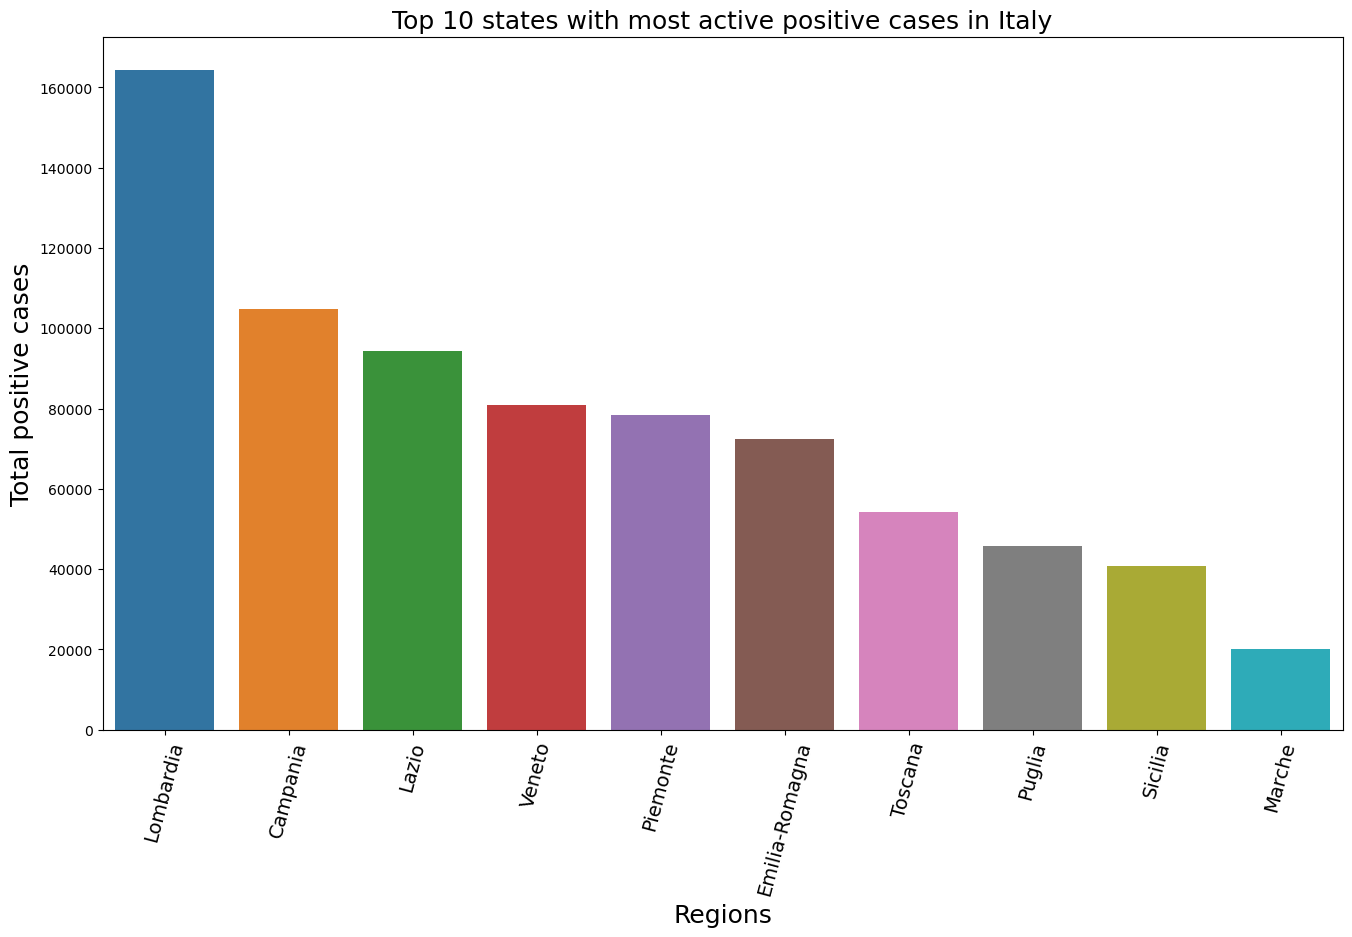

In [19]:
# Visualize Top 10 Regions 
fig = plt.figure(figsize=(16, 9))
plt.title("Top 10 states with most active positive cases in Italy", size=18)
sns.barplot(data = regionsWeise.iloc[:10], x=regionsWeise.iloc[:10].index, y='CurrentPositiveCases')
plt.xlabel('Regions', size=18)
plt.ylabel('Total positive cases', size=18)
plt.xticks(rotation=75, size=14)
#fig.show();

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lombardia'),
  Text(1, 0, 'Piemonte'),
  Text(2, 0, 'Emilia-Romagna'),
  Text(3, 0, 'Veneto'),
  Text(4, 0, 'Toscana'),
  Text(5, 0, 'Lazio'),
  Text(6, 0, 'Liguria'),
  Text(7, 0, 'Campania'),
  Text(8, 0, 'Sicilia'),
  Text(9, 0, 'Puglia')])

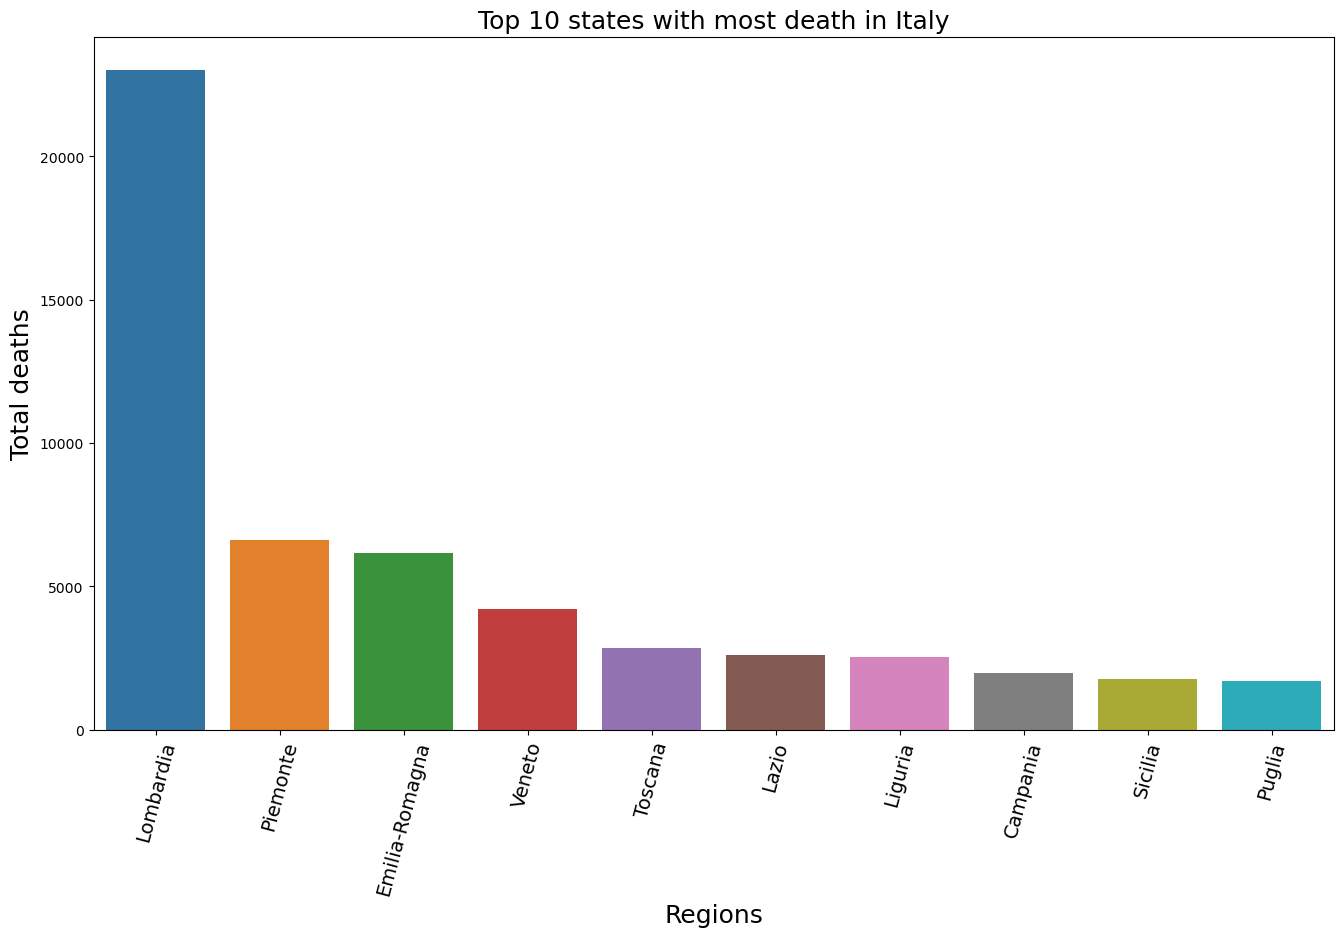

In [20]:
#Top 10 Region with highest death
regionsMostDeaths = regionsWeise.sort_values(by='Deaths', ascending=False)
fig = plt.figure(figsize=(16, 9))
plt.title("Top 10 states with most death in Italy", size=18)
sns.barplot(data = regionsMostDeaths.iloc[:10], x=regionsMostDeaths.iloc[:10].index, y='Deaths')
plt.xlabel('Regions', size=18)
plt.ylabel('Total deaths', size=18)
plt.xticks(rotation=75, size=14)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lombardia'),
  Text(1, 0, "Valle d'Aosta"),
  Text(2, 0, 'Liguria'),
  Text(3, 0, 'Emilia-Romagna'),
  Text(4, 0, 'Marche'),
  Text(5, 0, 'P.A. Trento'),
  Text(6, 0, 'Piemonte'),
  Text(7, 0, 'Abruzzo'),
  Text(8, 0, 'Friuli Venezia Giulia'),
  Text(9, 0, 'Puglia')])

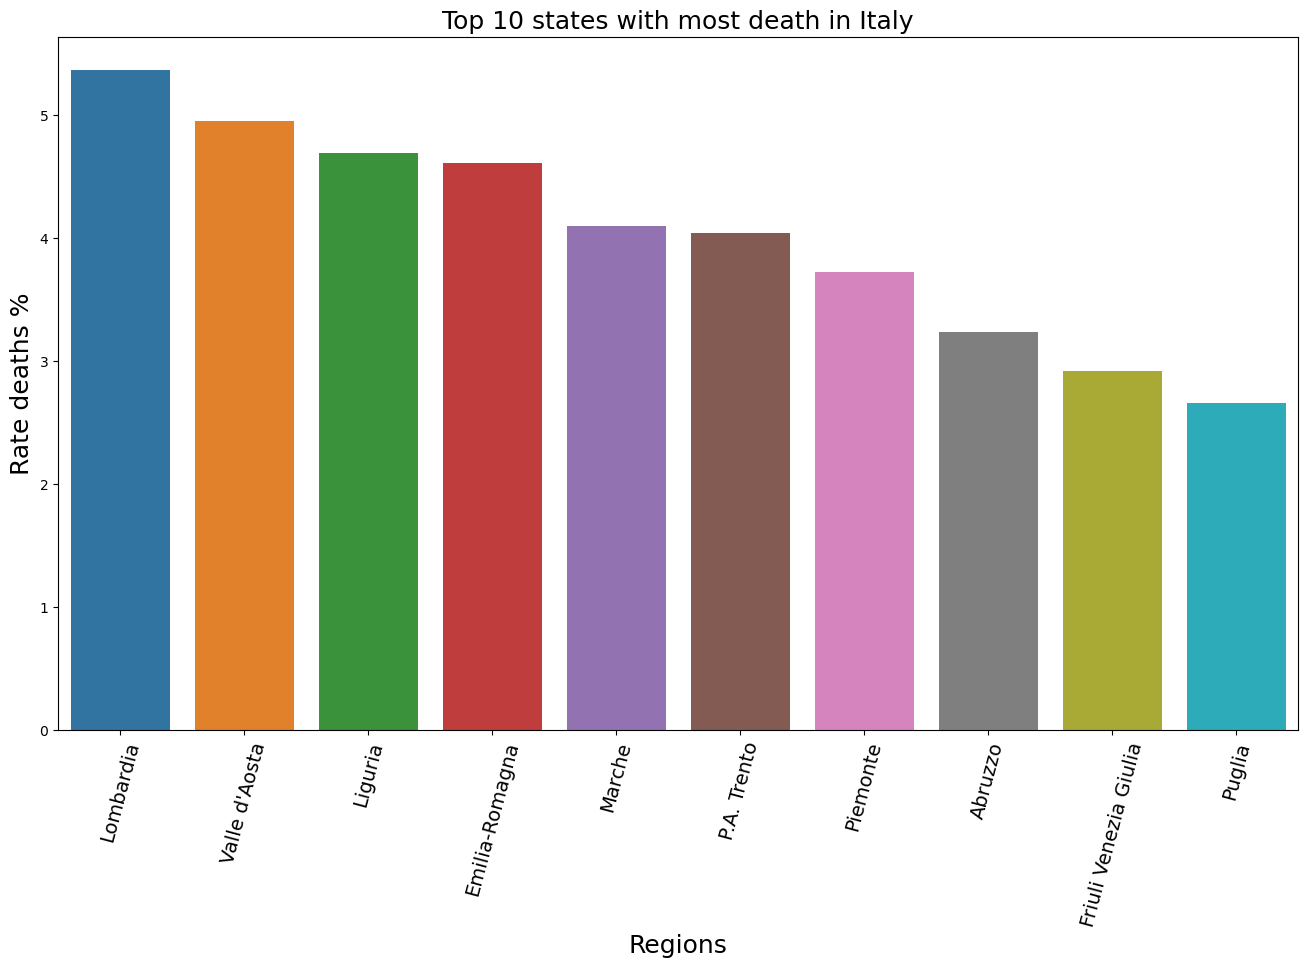

In [21]:
#Top 10 Region with highest rate of death
regionsMostRateDeaths = regionsWeise.sort_values(by='Death Rate', ascending=False)
fig = plt.figure(figsize=(16, 9))
plt.title("Top 10 states with most death in Italy", size=18)
sns.barplot(data = regionsMostRateDeaths.iloc[:10], x=regionsMostRateDeaths.iloc[:10].index, y='Death Rate')
plt.xlabel('Regions', size=18)
plt.ylabel('Rate deaths %', size=18)
plt.xticks(rotation=75, size=14)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'P.A. Trento'),
  Text(1, 0, "Valle d'Aosta"),
  Text(2, 0, 'Liguria'),
  Text(3, 0, 'Umbria'),
  Text(4, 0, 'Toscana'),
  Text(5, 0, 'Lombardia'),
  Text(6, 0, 'Piemonte'),
  Text(7, 0, 'Friuli Venezia Giulia'),
  Text(8, 0, 'P.A. Bolzano'),
  Text(9, 0, 'Veneto')])

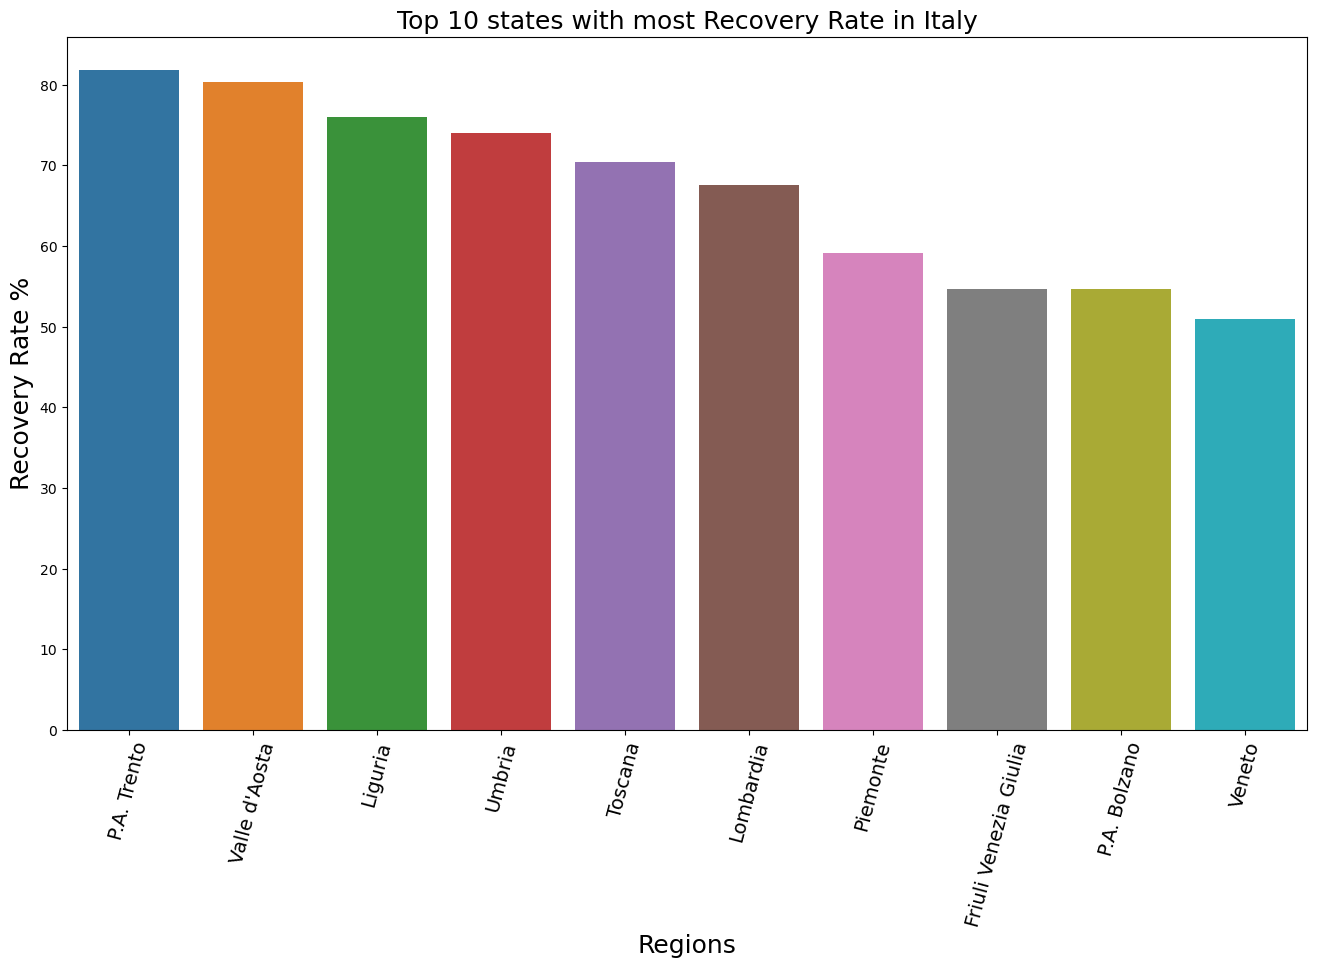

In [22]:
#Top 10 Region with highest rate of Recovery
regionsMostRateDeaths = regionsWeise.sort_values(by='Recovery Rate', ascending=False)
fig = plt.figure(figsize=(16, 9))
plt.title("Top 10 states with most Recovery Rate in Italy", size=18)
sns.barplot(data = regionsMostRateDeaths.iloc[:10], x=regionsMostRateDeaths.iloc[:10].index, y='Recovery Rate')
plt.xlabel('Regions', size=18)
plt.ylabel('Recovery Rate %', size=18)
plt.xticks(rotation=75, size=14)

Text(0.5, 1.0, 'Evaluation of propagation Cov-19 in 2020')

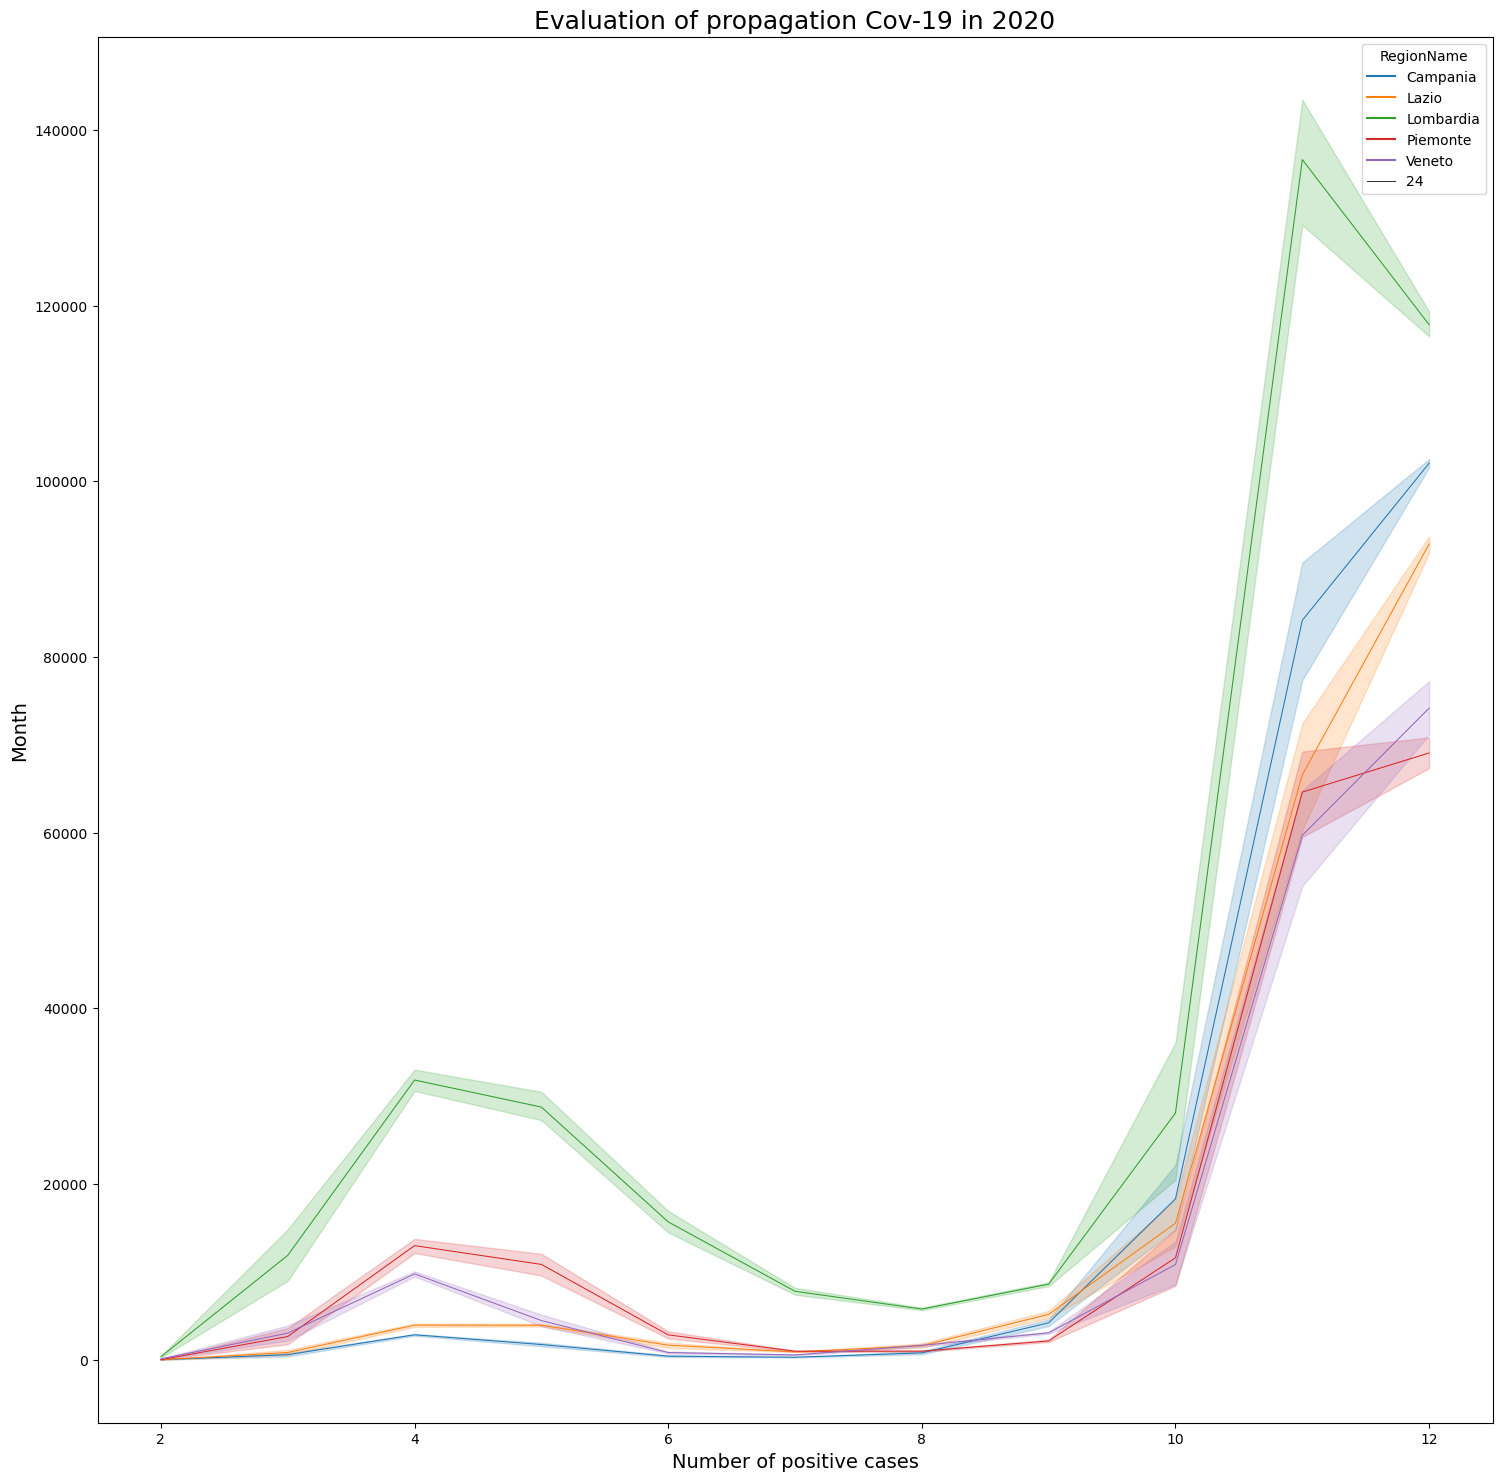

In [23]:
#Growth trend

Top5Regions = covid_df[covid_df.RegionName.isin(['Lombardia', 'Campania', 'Lazio', 'Veneto', 'Piemonte'])].copy()
Top5Regions['Month'] = Top5Regions.Date.dt.month 
fig = plt.figure(figsize=(18, 18))
sns.lineplot(data=Top5Regions,
             x='Month', y='CurrentPositiveCases', 
            hue='RegionName', size=24, legend="full")
plt.xlabel("Number of positive cases", size=14)
plt.ylabel("Month", size=14)
plt.title("Evaluation of propagation Cov-19 in 2020", size=18)

In [24]:
viccination_df

,administration_date,supplier,region,age_range,males,females,first_dose,second_dose,previous_infection,additional_booster_dose,second_booster,NUTS1_code,NUTS2_code,ISTAT_regional_code,region_name
0,2020-12-27,Moderna,LAZ,40-49,0,1,1,0,0,0,0,ITI,ITI4,12,Lazio
1,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,0,ITG,ITG1,19,Sicilia
2,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280735,2022-12-29,Pfizer/BioNTech,VEN,50-59,13,10,0,0,0,10,13,ITH,ITH3,5,Veneto
280736,2022-12-29,Pfizer/BioNTech,VEN,60-69,93,117,0,0,0,16,194,ITH,ITH3,5,Veneto
280737,2022-12-29,Pfizer/BioNTech,VEN,70-79,94,110,0,0,0,20,184,ITH,ITH3,5,Veneto
280738,2022-12-29,Pfizer/BioNTech,VEN,80-89,37,51,1,0,0,7,80,ITH,ITH3,5,Veneto


In [25]:
viccination_df.drop(['region', 'ISTAT_regional_code', 'NUTS1_code', 'NUTS2_code', 'ISTAT_regional_code'], inplace=True, axis=1)

In [26]:
viccination_df


,administration_date,supplier,age_range,males,females,first_dose,second_dose,previous_infection,additional_booster_dose,second_booster,region_name
0,2020-12-27,Moderna,40-49,0,1,1,0,0,0,0,Lazio
1,2020-12-27,Moderna,90+,0,1,1,0,0,0,0,Sicilia
2,2020-12-27,Pfizer/BioNTech,20-29,1,1,2,0,0,0,0,Abruzzo
3,2020-12-27,Pfizer/BioNTech,30-39,1,4,5,0,0,0,0,Abruzzo
4,2020-12-27,Pfizer/BioNTech,40-49,1,8,9,0,0,0,0,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...
280735,2022-12-29,Pfizer/BioNTech,50-59,13,10,0,0,0,10,13,Veneto
280736,2022-12-29,Pfizer/BioNTech,60-69,93,117,0,0,0,16,194,Veneto
280737,2022-12-29,Pfizer/BioNTech,70-79,94,110,0,0,0,20,184,Veneto
280738,2022-12-29,Pfizer/BioNTech,80-89,37,51,1,0,0,7,80,Veneto


In [27]:
regionsVaccination = pd.pivot_table(viccination_df, values=['males', 'females', 'first_dose', 'second_dose', 'additional_booster_dose', 'second_booster'],
                                   index='region_name', aggfunc= max)

In [28]:
NamesVaccination = pd.pivot_table(viccination_df, values=['males', 'females', 'first_dose', 'second_dose', 'additional_booster_dose', 'second_booster'],
                                   index='supplier', aggfunc= max)
NamesVaccination

,additional_booster_dose,females,first_dose,males,second_booster,second_dose
supplier,,,,,,
Janssen,0,11707,26721,15014,0,0
Moderna,19936,10170,7989,10084,3306,7832
ND,1,1,1,2,2,0
Novavax,0,142,306,185,0,243
Pfizer for children,0,7880,11310,8393,0,10101
Pfizer/BioNTech,11144,20456,43104,23756,6856,37640
Vaxzevria (AstraZeneca),0,14630,26222,12189,0,25156


In [29]:
NamesVaccination['Total of doses'] = NamesVaccination['additional_booster_dose'] + NamesVaccination['first_dose'] + NamesVaccination['second_dose'] + NamesVaccination['second_booster']
NamesVaccination

,additional_booster_dose,females,first_dose,males,second_booster,second_dose,Total of doses
supplier,,,,,,,
Janssen,0,11707,26721,15014,0,0,26721
Moderna,19936,10170,7989,10084,3306,7832,39063
ND,1,1,1,2,2,0,4
Novavax,0,142,306,185,0,243,549
Pfizer for children,0,7880,11310,8393,0,10101,21411
Pfizer/BioNTech,11144,20456,43104,23756,6856,37640,98744
Vaxzevria (AstraZeneca),0,14630,26222,12189,0,25156,51378


In [30]:
NamesVaccination['Total People'] = NamesVaccination['females'] + NamesVaccination['males']

In [31]:
NamesVaccination['% compared to Total of doses'] = NamesVaccination['Total of doses'] * 100 / sum(NamesVaccination['Total of doses'])
NamesVaccination

,additional_booster_dose,females,first_dose,males,second_booster,second_dose,Total of doses,Total People,% compared to Total of doses
supplier,,,,,,,,,
Janssen,0,11707,26721,15014,0,0,26721,26721,11.233447
Moderna,19936,10170,7989,10084,3306,7832,39063,20254,16.421995
ND,1,1,1,2,2,0,4,3,0.001682
Novavax,0,142,306,185,0,243,549,327,0.230798
Pfizer for children,0,7880,11310,8393,0,10101,21411,16273,9.001135
Pfizer/BioNTech,11144,20456,43104,23756,6856,37640,98744,44212,41.511750
Vaxzevria (AstraZeneca),0,14630,26222,12189,0,25156,51378,26819,21.599193


In [32]:
NamesVaccination['% compared to Total of persons'] = NamesVaccination['Total People'] * 100 / sum(NamesVaccination['Total People'])
NamesVaccination

,additional_booster_dose,females,first_dose,males,second_booster,second_dose,Total of doses,Total People,% compared to Total of doses,% compared to Total of persons
supplier,,,,,,,,,,
Janssen,0,11707,26721,15014,0,0,26721,26721,11.233447,19.850827
Moderna,19936,10170,7989,10084,3306,7832,39063,20254,16.421995,15.046542
ND,1,1,1,2,2,0,4,3,0.001682,0.002229
Novavax,0,142,306,185,0,243,549,327,0.230798,0.242926
Pfizer for children,0,7880,11310,8393,0,10101,21411,16273,9.001135,12.089088
Pfizer/BioNTech,11144,20456,43104,23756,6856,37640,98744,44212,41.511750,32.844758
Vaxzevria (AstraZeneca),0,14630,26222,12189,0,25156,51378,26819,21.599193,19.923631


In [33]:
regionsVaccination

,additional_booster_dose,females,first_dose,males,second_booster,second_dose
region_name,,,,,,
Abruzzo,2588,2023,4367,2390,787,2631
Basilicata,1317,1087,1587,1140,247,1636
Calabria,3665,2796,5687,2990,684,3327
Campania,9173,15273,23849,14856,1833,24628
Emilia-Romagna,10316,9449,19541,10766,3253,19356
Friuli-Venezia Giulia,2857,2094,4092,2536,880,4486
Lazio,10851,11277,19579,9345,4728,17228
Liguria,2679,2548,4697,2551,1176,3383
Lombardia,19936,20456,43104,23756,6856,37640


In [34]:
regionsVaccination['Total number of people'] = regionsVaccination['males'] + regionsVaccination['females']
regionsVaccination['Total number of doses' ] = regionsVaccination['first_dose'] + regionsVaccination['second_dose'] + regionsVaccination['additional_booster_dose'] + regionsVaccination['second_booster']
regionsVaccination

,additional_booster_dose,females,first_dose,males,second_booster,second_dose,Total number of people,Total number of doses
region_name,,,,,,,,
Abruzzo,2588,2023,4367,2390,787,2631,4413,10373
Basilicata,1317,1087,1587,1140,247,1636,2227,4787
Calabria,3665,2796,5687,2990,684,3327,5786,13363
Campania,9173,15273,23849,14856,1833,24628,30129,59483
Emilia-Romagna,10316,9449,19541,10766,3253,19356,20215,52466
Friuli-Venezia Giulia,2857,2094,4092,2536,880,4486,4630,12315
Lazio,10851,11277,19579,9345,4728,17228,20622,52386
Liguria,2679,2548,4697,2551,1176,3383,5099,11935
Lombardia,19936,20456,43104,23756,6856,37640,44212,107536


In [35]:
regionsVaccination = regionsVaccination.sort_values(by=['Total number of people'], ascending=False)
regionsVaccination

,additional_booster_dose,females,first_dose,males,second_booster,second_dose,Total number of people,Total number of doses
region_name,,,,,,,,
Lombardia,19936,20456,43104,23756,6856,37640,44212,107536
Campania,9173,15273,23849,14856,1833,24628,30129,59483
Veneto,9603,12549,25208,13813,2634,23368,26362,60813
Toscana,9607,12182,17683,9102,3895,17644,21284,48829
Lazio,10851,11277,19579,9345,4728,17228,20622,52386
Emilia-Romagna,10316,9449,19541,10766,3253,19356,20215,52466
Piemonte,8133,7548,15846,8741,3306,13122,16289,40407
Sicilia,7085,8597,14424,7532,1443,9814,16129,32766
Puglia,7909,7568,12402,6460,2156,11401,14028,33868


Text(0, 0.5, 'Number of people')

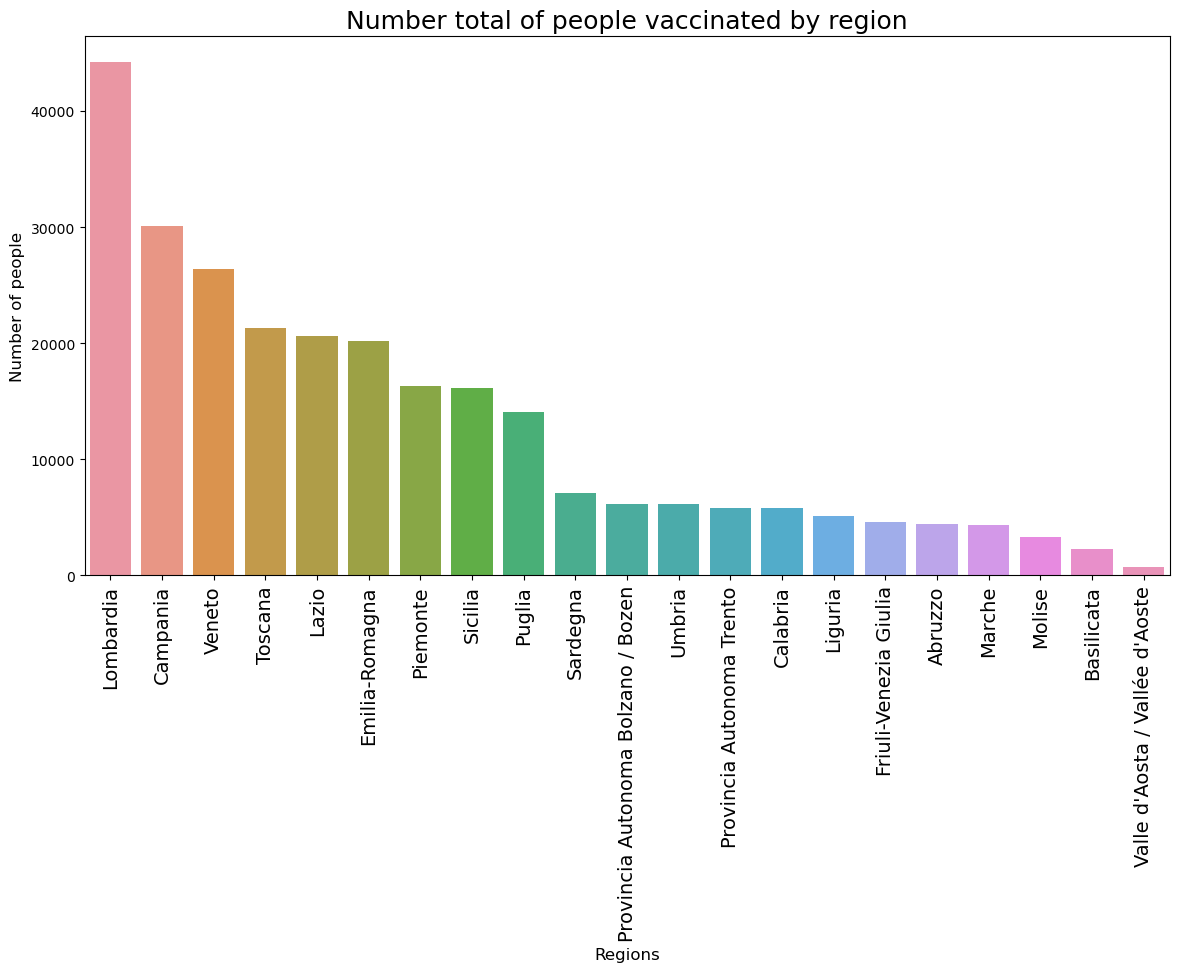

In [36]:
plt.figure(figsize=(14, 7))
plt.title('Number total of people vaccinated by region', size=18)
sns.barplot(data=regionsVaccination, x=regionsVaccination.index, y='Total number of people')
plt.xticks(rotation=90, size=14)
plt.xlabel('Regions', size=12)
plt.ylabel('Number of people', size=12)

Text(0, 0.5, 'Number of people')

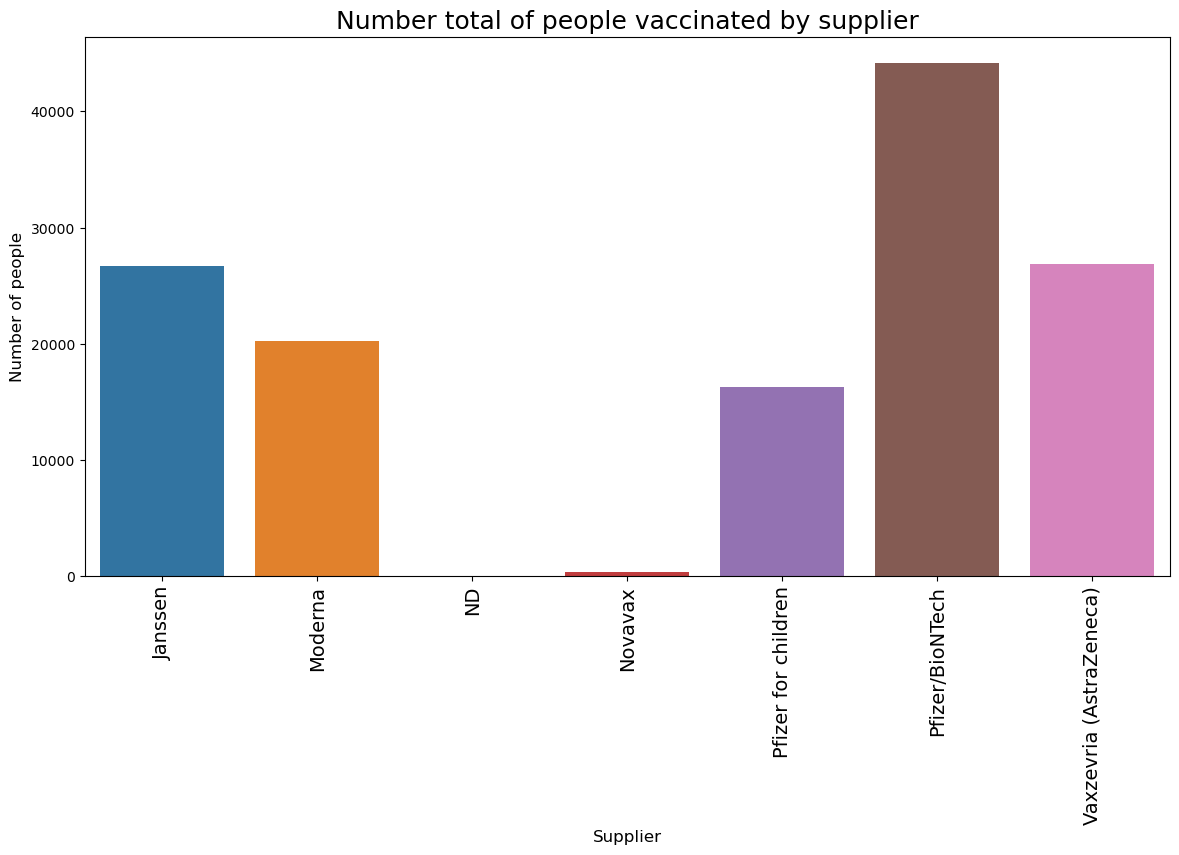

In [37]:
plt.figure(figsize=(14, 7))
plt.title('Number total of people vaccinated by supplier', size=18)
sns.barplot(data=NamesVaccination, x=NamesVaccination.index, y='Total People')
plt.xticks(rotation=90, size=14)
plt.xlabel('Supplier', size=12)
plt.ylabel('Number of people', size=12)

Text(0, 0.5, 'Number of doses')

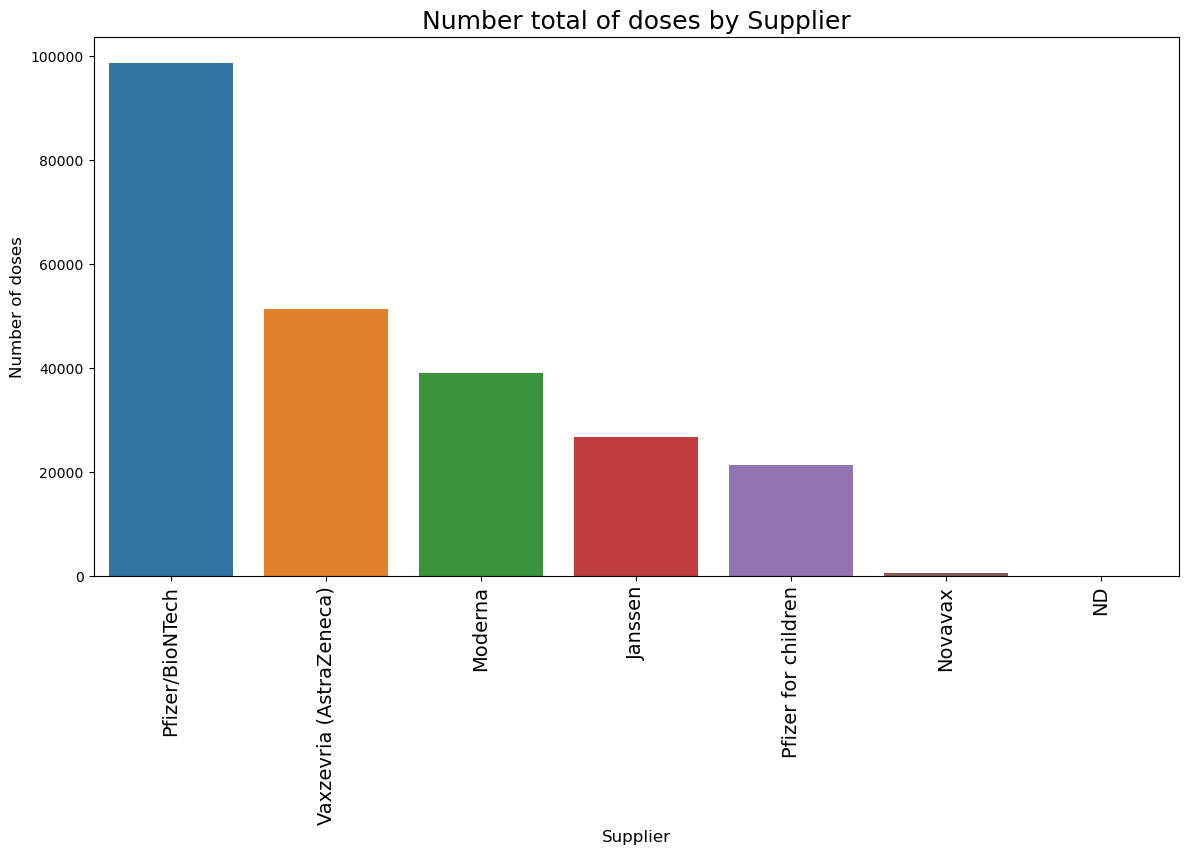

In [38]:

plt.figure(figsize=(14, 7))
plt.title('Number total of doses by Supplier', size=18)
sns.barplot(data=NamesVaccination.sort_values(by='Total of doses', ascending=False), x=NamesVaccination.sort_values(by='Total of doses', ascending=False).index, y='Total of doses')
plt.xticks(rotation=90, size=14)
plt.xlabel('Supplier', size=12)
plt.ylabel('Number of doses', size=12)

In [42]:
VaccinationByDate = pd.pivot_table(data=viccination_df, index='administration_date',
                                  values=['males', 'females', 'first_dose', 'second_dose', 'additional_booster_dose', 'second_booster'],
                                  aggfunc='max'
)
VaccinationByDate['Total of doses'] = VaccinationByDate['additional_booster_dose'] + VaccinationByDate['second_booster'] + VaccinationByDate['first_dose'] + VaccinationByDate['second_dose']
VaccinationByDate

,additional_booster_dose,females,first_dose,males,second_booster,second_dose,Total of doses
administration_date,,,,,,,
2020-12-27,0,217,338,160,0,0,338
2020-12-28,0,175,283,110,0,0,283
2020-12-29,0,121,181,60,0,0,181
2020-12-30,0,300,448,158,0,0,448
2020-12-31,0,980,1548,571,0,0,1548
...,...,...,...,...,...,...,...
2022-12-25,2,3,0,2,4,0,6
2022-12-26,9,30,1,45,66,2,78
2022-12-27,65,430,12,427,810,11,898


Text(0.5, 1.0, 'Evaluation of propagation Cov-19 in 2020')

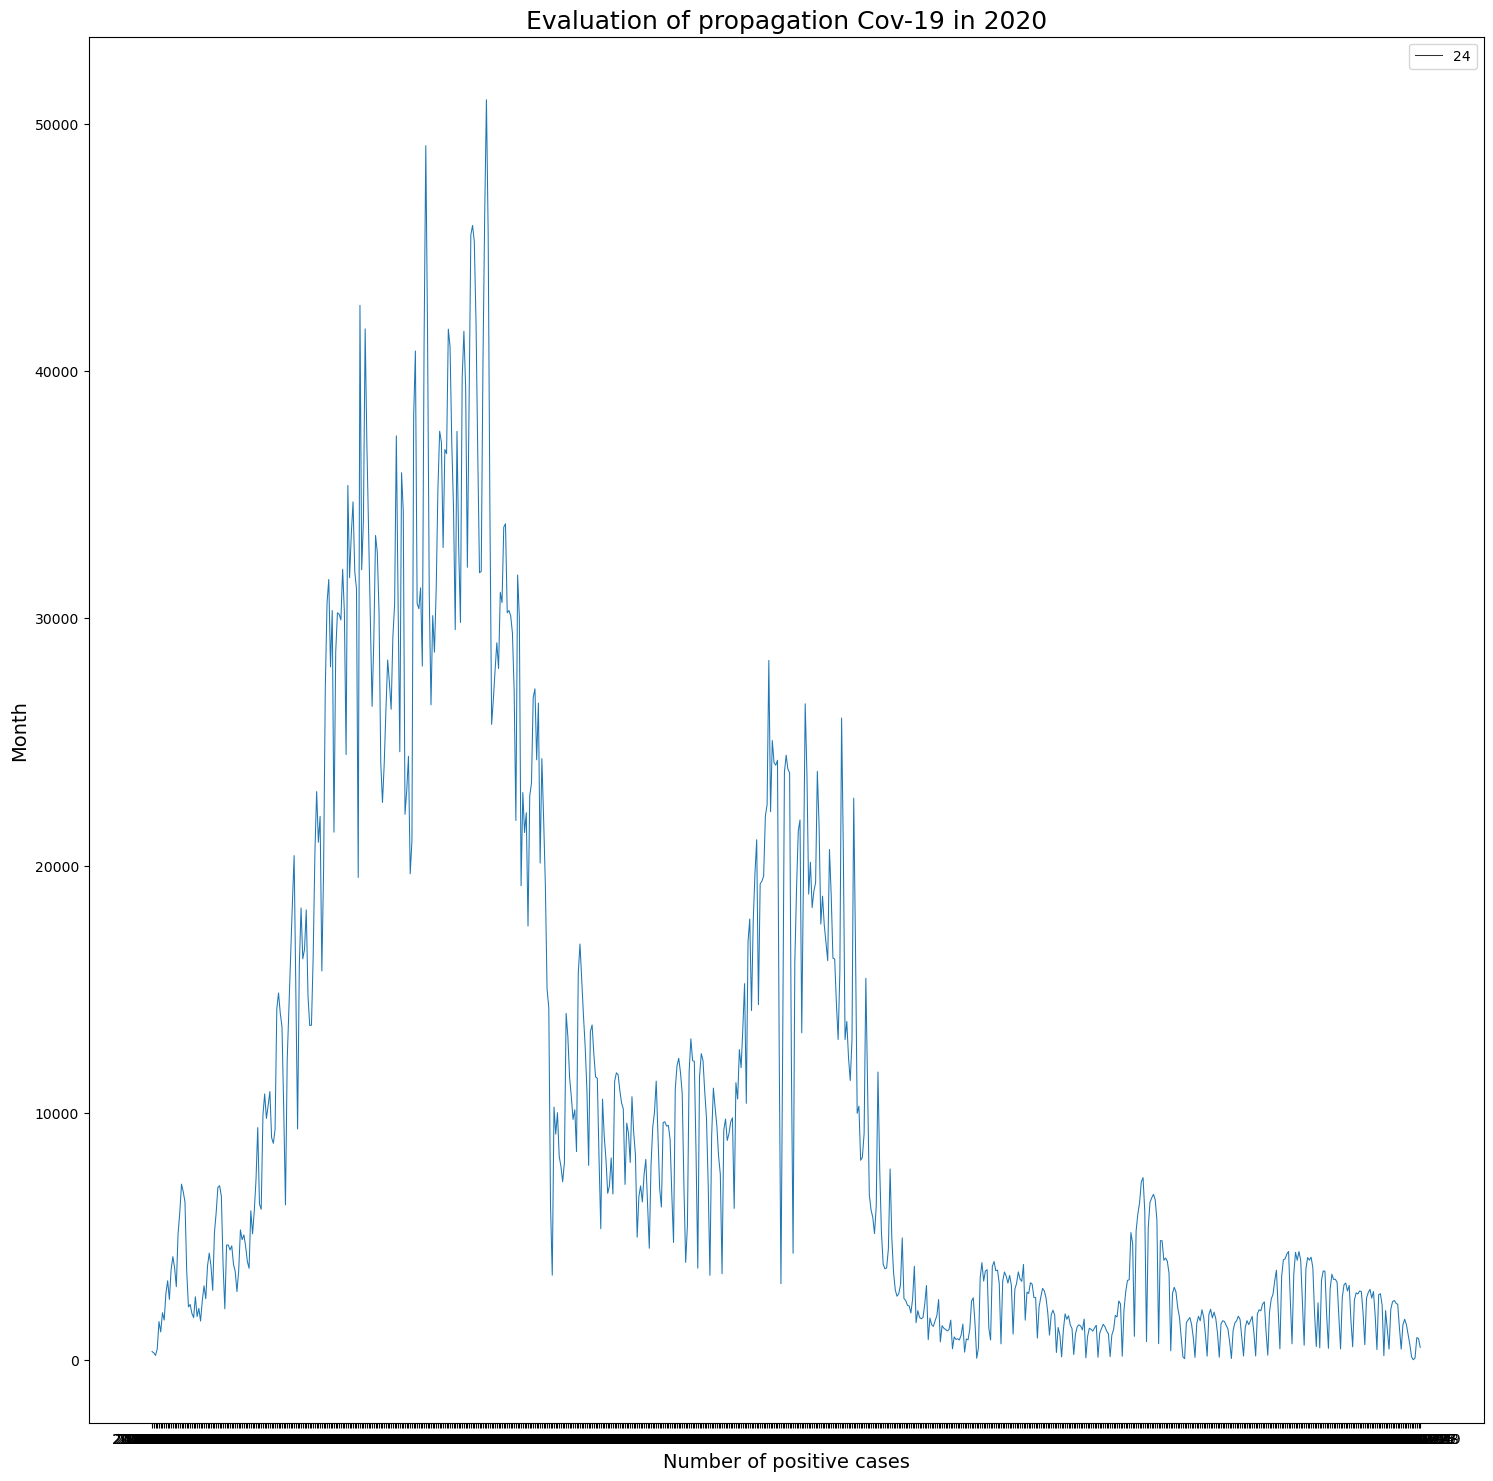

In [43]:
#Growth trend
fig = plt.figure(figsize=(18, 18))
sns.lineplot(data=VaccinationByDate,
             x='administration_date', y='Total of doses', 
             size=24, legend="full")
plt.xlabel("Number of positive cases", size=14)
plt.ylabel("Month", size=14)
plt.title("Evaluation of propagation Vaccination between December 2020 and December 2022", size=18)
